In [0]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

import itertools
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix



*   We read the dataset and print the number reviews with each different overall rating



*   Then, we create a balanced dataset by taking only 2500 reviews of each overall rating





In [0]:
df = pd.read_json('Digital_Music_5.json',lines=True)

print(df['overall'].value_counts())

ratings = np.zeros(5)
deleted = []
for index,row in df.iterrows():
  ratings[row['overall']-1] += 1
  if ratings[row['overall']-1] >= 2500:
    deleted.append(index)
    
df = df.drop(df.index[deleted])
df = df.sample(frac=1).reset_index(drop=True)

5    35580
4    16536
3     6789
2     3010
1     2791
Name: overall, dtype: int64


We select the 'reviewText' column as our input and the 'overall' as our output.

The dataset is then splited into training and testsing sets with a ration of 4:1, and the TfIdf vectorizer is used to create 1D input vectors of size 40000, where each vector represents a review text by the TfIdf values of terms existing in it.

In [0]:
X = df['reviewText']
y = df['overall']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

tfidf_vectorizer = TfidfVectorizer(max_features=40000)
X_train_transformed = tfidf_vectorizer.fit_transform(X_train)
X_test_transformed = tfidf_vectorizer.transform(X_test)

- We tried several architectures and the best one was having two layers with 128 and 512 neurons respectively. The worst one is {128, 512, 1024}.

- Early stoping is used as a regularization method. The default ration between validation set and train set sizes is used (0.1).

- The best scoring metric would be accuracy, since this is a classifier and we want to see how many datapoints in the test set the classifier will get correctly. Accuracy is also a good metric here since the dataset is balanced.

In [0]:
clf = MLPClassifier(
    hidden_layer_sizes=(128,),
    random_state=1,
    early_stopping=True)

clf.n_outputs_ = 5

clf.fit(X_train_transformed, y_train)



predicted_targets = clf.predict(X_test_transformed)

print(metrics.accuracy_score(predicted_targets, y_test))

0.6162464985994398


In [0]:
clf = MLPClassifier(
    hidden_layer_sizes=(512,),
    random_state=1,
    early_stopping=True)

clf.n_outputs_ = 5

clf.fit(X_train_transformed, y_train)



predicted_targets = clf.predict(X_test_transformed)

print(metrics.accuracy_score(predicted_targets, y_test))

0.6234493797519007


In [0]:
clf = MLPClassifier(
    hidden_layer_sizes=(1024,),
    random_state=1,
    early_stopping=True)

clf.n_outputs_ = 5

clf.fit(X_train_transformed, y_train)

predicted_targets = clf.predict(X_test_transformed)

print(metrics.accuracy_score(predicted_targets, y_test))

0.6246498599439776


In [0]:
clf = MLPClassifier(
    hidden_layer_sizes=(128,512,),
    random_state=1,
    early_stopping=True)

clf.n_outputs_ = 5

clf.fit(X_train_transformed, y_train)

predicted_targets = clf.predict(X_test_transformed)

print(metrics.accuracy_score(predicted_targets, y_test))

0.6266506602641057


In [0]:
clf = MLPClassifier(
    hidden_layer_sizes=(512,128),
    random_state=1,
    early_stopping=True)

clf.n_outputs_ = 5

clf.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)

print(metrics.accuracy_score(y_pred, y_test))

0.5994397759103641


In [0]:
clf = MLPClassifier(
    hidden_layer_sizes=(128,512,1024,),
    random_state=1,
    early_stopping=True)

clf.n_outputs_ = 5

clf.fit(X_train_transformed, y_train)

predicted_targets = clf.predict(X_test_transformed)

print(metrics.accuracy_score(predicted_targets, y_test))

0.584233693477391


In [0]:
clf = MLPClassifier(
    hidden_layer_sizes=(1024,512,128,),
    random_state=1,
    early_stopping=True)

clf.n_outputs_ = 5

clf.fit(X_train_transformed, y_train)

predicted_targets = clf.predict(X_test_transformed)

print(metrics.accuracy_score(predicted_targets, y_test))

0.6066426570628252


We plot the confusion matrix. It is apparent that the values at both ends of the rating range have higher accuracy than values in the middle.

This might be due to the fact that values in the middle are more prone to be confused with values around them.

Confusion matrix, without normalization
[[334  98  21   8  13]
 [114 278  83  20  13]
 [ 17  98 216 122  29]
 [  6  21  79 316  88]
 [ 11   7  11  74 422]]
Normalized confusion matrix
[[0.7  0.21 0.04 0.02 0.03]
 [0.22 0.55 0.16 0.04 0.03]
 [0.04 0.2  0.45 0.25 0.06]
 [0.01 0.04 0.15 0.62 0.17]
 [0.02 0.01 0.02 0.14 0.8 ]]


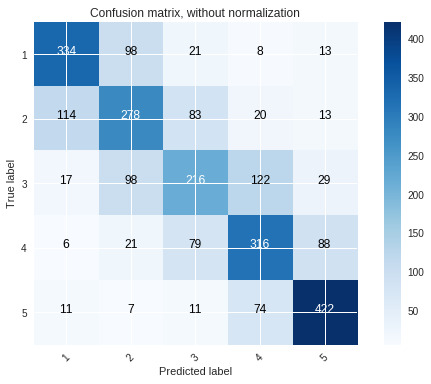

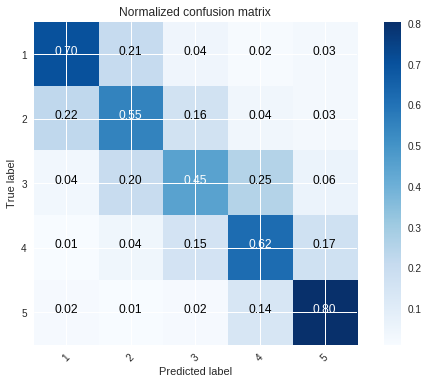

In [0]:
class_names={1,2,3,4,5}
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted_targets)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

The output activation function is softmax. sklearn determines this function automatically based on the number of outputs, it uses sigmoid for binary classification and softmax for multi-class classification. 

http://scikit-learn.org/stable/modules/neural_networks_supervised.html#mathematical-formulation

In [0]:
print(clf.out_activation_)

softmax


# **Bonus :**

Printing some of the predicted values and the actual ones from the test set.

In [0]:
for i in range(0,100):
  print (predicted_targets[i], y_test.values[i])

2 2
4 3
5 5
5 4
1 1
1 1
5 5
1 1
1 1
1 1
4 2
3 4
5 5
1 1
5 5
2 3
3 3
1 2
2 3
5 5
2 2
5 5
2 1
4 4
1 1
4 5
5 5
2 2
2 2
5 3
2 2
5 4
5 5
5 5
1 1
2 4
5 5
2 1
3 3
5 5
1 1
4 5
4 5
3 3
5 5
1 1
1 1
2 1
3 3
4 4
2 1
3 1
1 2
2 2
5 4
5 5
1 1
4 1
2 2
4 3
3 2
2 2
4 4
3 4
5 5
2 2
2 1
4 4
1 2
4 4
4 4
5 5
5 4
2 2
4 4
2 2
4 4
2 2
5 5
3 3
5 4
1 1
5 3
3 3
2 1
3 3
5 5
5 5
5 3
1 1
1 2
4 5
4 3
1 1
3 3
3 2
5 5
3 3
5 3
4 4


Some of the reasons we think the network fails :

- Values in the middle need more representation in the dataset to make the network better at recognizing them.

- Stopwords (e.g. in, the, of ) need to be removed from the dataset because they are probably affecting the networks's accuracy.

- All text should be converted to lower case, that way words like 'Good' and 'good' are seen as one word.

In the following code cells, we implement those suggestions :

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
df = pd.read_json('Digital_Music_5.json',lines=True)

newDf = df[df['overall']==1.0].head(2500)
newDf = newDf.append(df[df['overall']==2.0].head(3000),ignore_index=True)
newDf = newDf.append(df[df['overall']==3.0].head(3000),ignore_index=True)
newDf = newDf.append(df[df['overall']==4.0].head(3000),ignore_index=True)
newDf = newDf.append(df[df['overall']==5.0].head(2500),ignore_index=True)

df = newDf.sample(frac=1).reset_index(drop=True)

In [0]:
X = df['reviewText']

X = X.apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stop)]))

y = df['overall']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

tfidf_vectorizer = TfidfVectorizer(max_features=40000)
X_train_transformed = tfidf_vectorizer.fit_transform(X_train)
X_test_transformed = tfidf_vectorizer.transform(X_test)

In [0]:
print(X)

0        really buy dmx's religious beliefs, especially...
1        album, roy sounds substantially years ago. nev...
2        stevie wonder / innervisions: landmark masterp...
3        one cool j's best singles, song delivered time...
4        released march 25th, 2003, meteora linkin park...
5        personally,i never could stand country. i'm am...
6        one day im enrique's, haunt billy used regular...
7        want take break traditional country music, her...
8        honestly, none songs memorable sounds slick we...
9        sonny rollins - way west sacdi admit shocked s...
10       nothing like getting hooked song first comes o...
11       cant find one good song whole thing, ignore re...
12       first all, new daft punk, mostly random access...
13       although several songs aged well, majority alb...
14       side one album top notch alice cooper; side tw...
15       favorite teena marie album (tied "robbery") mu...
16       picked one bargain bin way released. liked eur.

In [0]:
clf = MLPClassifier(
    hidden_layer_sizes=(128,512,),
    random_state=1,
    early_stopping=True)

clf.n_outputs_ = 5

clf.fit(X_train_transformed, y_train)

predicted_targets = clf.predict(X_test_transformed)

print(metrics.accuracy_score(predicted_targets, y_test))

0.6003571428571428
